In [1]:
import os
from dataLoader import fc7FrameSequenceGenerator
from hdf5_npstreamsequence_generator import HDF5SequenceWriter

In [2]:
# start every sentence in a new array, pad if <max
MAX_WORDS = 100 # 80  # max length of whole sequence
BUFFER_SIZE = 32 # number of streams for a batch of data
FEAT_DIM = 20

BATCH_STREAM_LENGTH = 1000  # length for a stream of data 
SETTING = '/data/gengshan/pose_s2vt'
FRAMEFEAT_FILE_PATTERN = SETTING + '/splits/dataCsv_{0}.txt'
SENTS_FILE_PATTERN = SETTING + '/splits/dataTsv_{0}.txt'  # input paths

OUTPUT_DIR = '{0}/hdf5/buffer_{1}_s2vt_{2}'.format(SETTING, BUFFER_SIZE, MAX_WORDS)
OUTPUT_DIR_PATTERN = '%s/%%s_batches' % OUTPUT_DIR
# VOCAB = '/data/gengshan/s2vt/vocabulary_whole.txt'  
VOCAB = '%s/whole_vocabulary.txt' % SETTING

OUT_FILE_PATTERN = SETTING + '/rawcorpus/{0}/s2vt_vgg_{0}_sequence.txt'
OUT_CORPUS_PATH = SETTING + '/rawcorpus/{0}'

def preprocess_dataset(split_name, data_split_name, batch_stream_length,
                      aligned=False, reverse=False):
    filenames = [FRAMEFEAT_FILE_PATTERN.format(data_split_name),
               SENTS_FILE_PATTERN.format(data_split_name)]
    output_path = OUTPUT_DIR_PATTERN % split_name  # output hdf5
    aligned = True
    
    fsg = fc7FrameSequenceGenerator(filenames, BUFFER_SIZE, VOCAB,
         feat_dim = FEAT_DIM, max_words=MAX_WORDS, align=aligned, shuffle=True, pad=aligned,
         truncate=aligned, reverse=reverse)
    fsg.batch_stream_length = batch_stream_length

    ''' write h5 files and file lists for caffe training '''
    writer = HDF5SequenceWriter(fsg, output_dir=output_path)
    writer.write_to_exhaustion()  
    writer.write_filelists()
    
    ''' printing vocabulary information '''
    if not os.path.isfile(VOCAB):
        print "Vocabulary not found"
        # fsg.dump_vocabulary(vocab_out_path)
    else:
        print('using vocabulary file ' + VOCAB)
        
    ''' ourput corpus '''
    out_path = OUT_CORPUS_PATH.format(data_split_name)  
    vid_id_order_outpath = '%s/yt_s2vtvgg_%s_vidid_order_%d_%d.txt' % \
        (out_path, data_split_name, BUFFER_SIZE, MAX_WORDS)
    frame_sequence_outpath = '%s/yt_s2vtvgg_%s_sequence_%d_%d_recurrent.txt' % \
        (out_path, data_split_name, BUFFER_SIZE, MAX_WORDS)
    # didn't use print('dumping frame sequence to ' + frame_sequence_outpath)
    print('dumping video order file to ' + vid_id_order_outpath)
    fsg.dump_video_file(vid_id_order_outpath, frame_sequence_outpath)
    
    return

In [3]:
# split_name, data_split_name, aligned 
# DATASETS = [('train', 'train', False, False), ('val', 'val', False, False)]
DATASETS = [('train_2', 'train', False, False), ('val_2', 'val', False, False)]
for split_name, data_split_name, aligned, reverse in DATASETS:
    preprocess_dataset(split_name, data_split_name, BATCH_STREAM_LENGTH,aligned, reverse)

Reading frame features from file: /data/gengshan/pose_s2vt/splits/dataCsv_train.txt
Reading sentences in: /data/gengshan/pose_s2vt/splits/dataTsv_train.txt
Initializing the vocabulary.
Initialized vocabulary from file with 13852 unique words (from 13851 total words in dataset).
Processed 0/37312 (0.000000%) lines
Processed 1/37312 (0.002680%) lines
Processed 100/37312 (0.268010%) lines
Processed 200/37312 (0.536021%) lines
Processed 300/37312 (0.804031%) lines
Processed 400/37312 (1.072041%) lines
Processed 500/37312 (1.340051%) lines
Processed 600/37312 (1.608062%) lines
Processed 700/37312 (1.876072%) lines
Processed 800/37312 (2.144082%) lines
Processed 900/37312 (2.412093%) lines
Processed 1000/37312 (2.680103%) lines
Processed 1100/37312 (2.948113%) lines
Processed 1200/37312 (3.216123%) lines
Processed 1300/37312 (3.484134%) lines
Processed 1400/37312 (3.752144%) lines
Processed 1500/37312 (4.020154%) lines
Processed 1600/37312 (4.288165%) lines
Processed 1700/37312 (4.556175%) l

In [ ]:
''' count frame/sent length '''

In [21]:
with open('/data/gengshan/pose_s2vt/rawcorpus/train/yt_s2vtvgg_train_vidid_order_32_160.txt', 'r') as f:
    alllines = f.readlines()
keys = alllines[0].split('\t')

In [27]:
out = []
for it, item in enumerate(alllines[1:]):
    structuredItem = {}
    itemData = item.split('\t')
    for itt, key in enumerate(keys):
        structuredItem[key] = itemData[itt]
    out.append(structuredItem)
    

In [34]:
import numpy
print(keys[3])
counts = [int(x[keys[3]]) for x in out]
numpy.mean(counts)

total_count



54.928253644939964

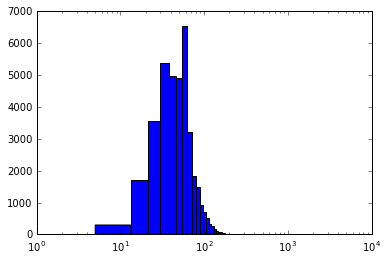

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(counts, bins = 1000);
plt.xscale('log')